In [1]:
#install.packages('forecast')

Installing package into 'C:/Users/tjoeun302-18/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'forecast' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'forecast'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\tjoeun302-18\Documents\R\win-library\3.6\00LOCK\forecast\libs\x64\forecast.dll를 C:\Users\tjoeun302-18\Documents\R\win-library\3.6\forecast\libs\x64\forecast.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'forecast'"


The downloaded binary packages are in
	C:\Users\tjoeun302-18\AppData\Local\Temp\RtmpItZk2F\downloaded_packages


In [2]:
#시계열 분석을 위한 라이브러리 로딩
library(TTR)
library(forecast)

Warning message:
"package 'TTR' was built under R version 3.6.2"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Warning message:
"package 'forecast' was built under R version 3.6.2"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [4]:
#skip 3 3행을 건너뛰고 일어옴
kings<-scan('http://robjhyndman.com/tsdldata/misc/kings.dat',
           skip=3)
kings
class(kings) #numeric 데이터

[1] 60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59 48
[26] 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56

[1] "numeric"

[1] "ts"

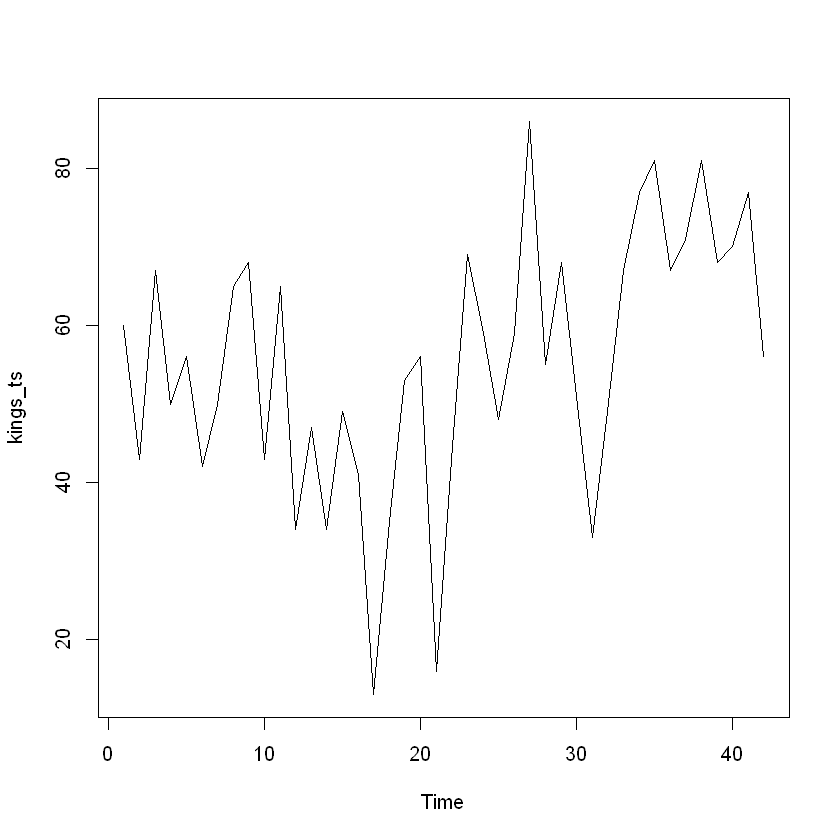

In [6]:
#숫자형 자료를 시계열 자료로 변환
kings_ts <-ts(kings)
class(kings_ts)
#시계열 그래프
plot.ts(kings_ts)

[1]   NA 1025 1030 1015 1030

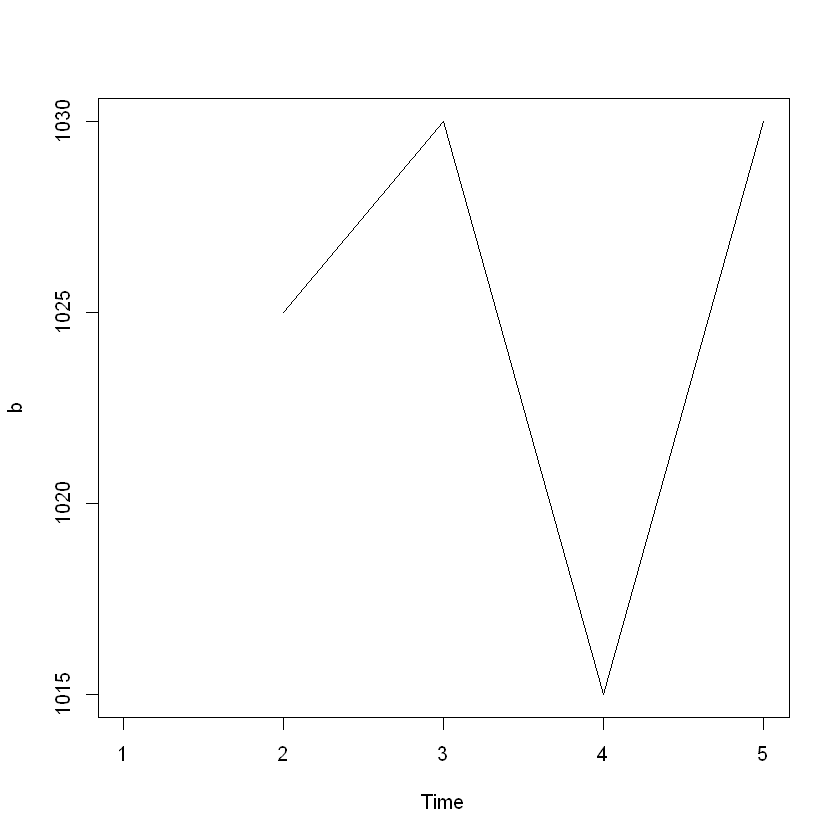

In [8]:
a<-c(1000,1050,1010,1020,1040)
b<-SMA(a,n=2) #2차 이동평균
b
plot.ts(b)

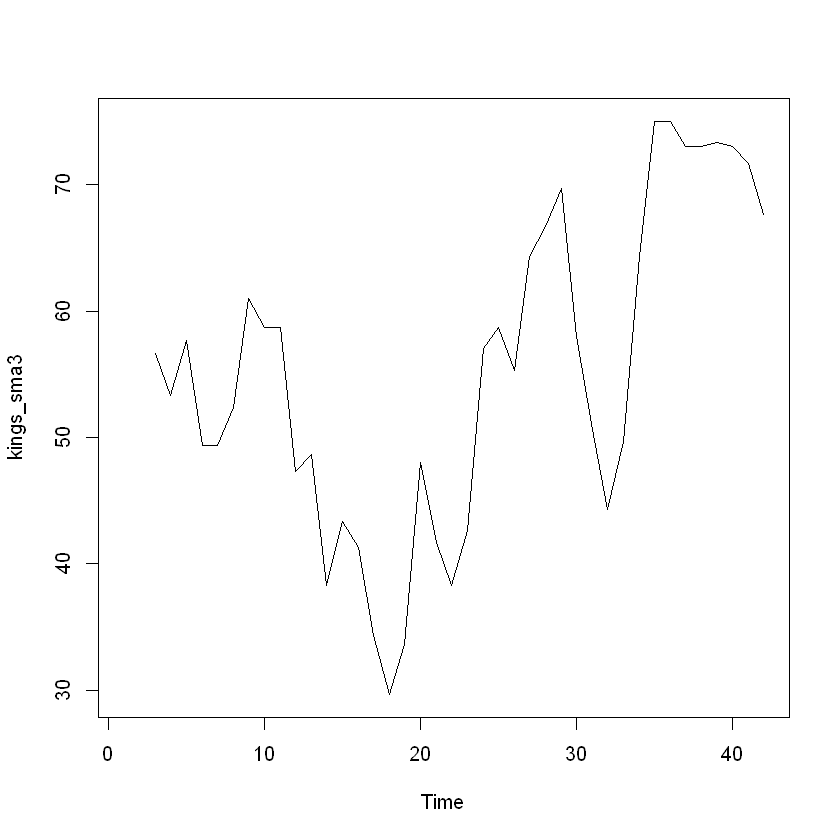

In [9]:
#n=3 3차 이동평균 MA(3) 모형으로 그린 그래프
kings_sma3<- SMA(kings_ts, n=3)
plot.ts(kings_sma3)

In [ ]:
b
c<-diff(b,differences=1)

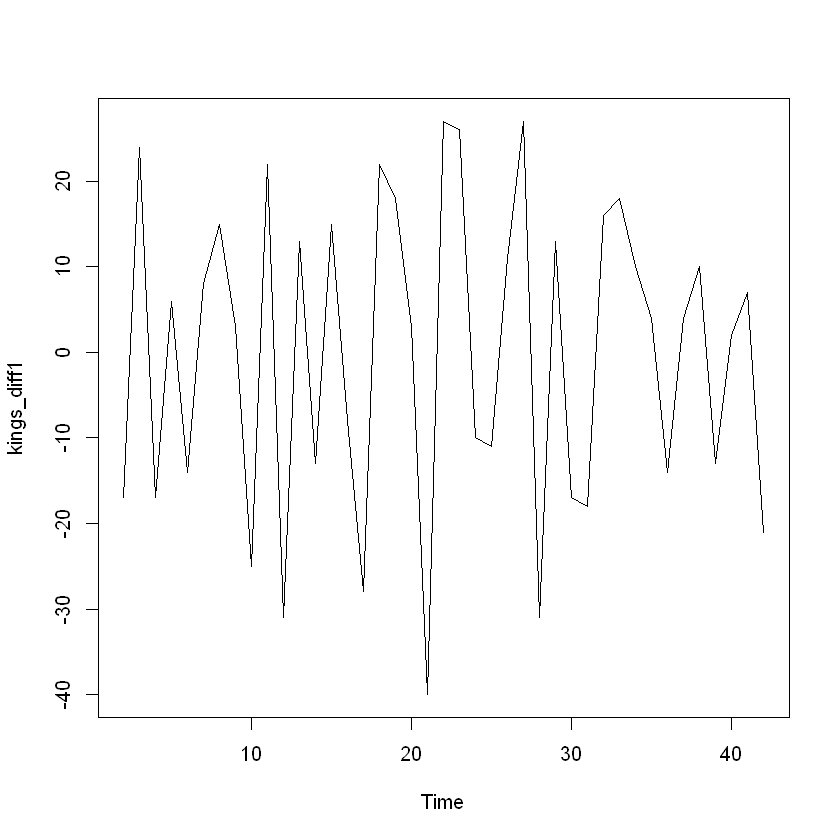

In [10]:
#1차 차분으로 그린 그래프
kings_diff1<- diff(kings_ts, differences=1)
plot.ts(kings_diff1)

In [ ]:
library(tseries)
# adf.test 함수를 이용하여 안정적인 시계열 자료인지 확인
# p-value 확인
adf.test(diff(log(kings_ts)),alternative='stationary',k=0)

In [ ]:
#최적의 arima 모형을 도출
auto.arima(ts(kings))
#arima 모형으로 도출된 값
kings_arima<- arima(kings_ts, order=c(0,1,1))
#5대 후의 왕의 수명 예측
kings_fcast<- forecast(kings_arima, h=5)
kings_fcast
plot(kings_fcast)